In [1]:
import numpy as np
import os 

In [2]:
from metrics import Metrics

In [3]:
np.loadtxt('projections/proj_X_bank_MDS.csv', delimiter=',')

array([[-2.89449803, -0.69806495],
       [-1.71518905,  1.77076763],
       [ 0.99297539,  2.65867469],
       ...,
       [-0.07937171,  2.66296258],
       [-0.4830813 ,  1.8602756 ],
       [-3.42261179,  0.89451988]])

In [6]:
small_data = ["auto-mpg.npy", "iris.npy", "penguins.npy", "s-curve.npy", "swissroll.npy", "wine.npy"]

In [7]:
results = dict()
results_scale = dict()
for dataFname in os.listdir("datasets"):
    if "spam" in dataFname: continue
    if dataFname in small_data: continue
    X = np.load(f'datasets/{dataFname}')
    dataname = dataFname.split(".")[0]

    results[dataname] = dict()
    results_scale[dataname] = dict()
    for alg in ["T-SNE", "MDS", "UMAP", "LLE", "ISO"]:

        Y = np.loadtxt(f'projections/proj_X_{dataname}_{alg}.csv', delimiter=',')

        M = Metrics(X,Y)
        results[dataname][alg] = M.compute_normalized_stress()
        results_scale[dataname][alg] = M.compute_scale_normalized_stress()


In [8]:
results

{'har': {'T-SNE': 3.7437275794387244,
  'MDS': 0.18850760577954118,
  'UMAP': 1.5225423619858391,
  'LLE': 0.9923183852611865,
  'ISO': 1.6159696370534893},
 'cifar10': {'T-SNE': 1.7053708874089946,
  'MDS': 0.2680166127840462,
  'UMAP': 0.6453420904463467,
  'LLE': 0.9971628860010159,
  'ISO': 0.5857594788781639},
 'orl': {'T-SNE': 2.104453827124266,
  'MDS': 0.04423510574455848,
  'UMAP': 27.149901620363117,
  'LLE': 0.9883602163639552,
  'ISO': 0.5851011578313979},
 'epileptic': {'T-SNE': 16.71037753750601,
  'MDS': 0.19368368797408272,
  'UMAP': 115.85324833761882,
  'LLE': 0.987055576358625,
  'ISO': 0.6340626040444473},
 'fmd': {'T-SNE': 0.9673144145818462,
  'MDS': 0.4676925293615519,
  'UMAP': 2.5265764085373474,
  'LLE': 0.9931158782685754,
  'ISO': 0.88225953104138},
 'sentiment': {'T-SNE': 33.20669574507467,
  'MDS': 0.3946739638994402,
  'UMAP': 10.242821258711356,
  'LLE': 0.977510666817704,
  'ISO': 1.4373639889532839},
 'fashion_mnist': {'T-SNE': 2.1378014532904555,
  'M

In [10]:
overall_results = {
    "normalized": results, 
    "scale-normalized": results_scale
}

In [11]:
import json 
with open("espadato_rerun.json", "w") as fdata:
    json.dump(overall_results, fdata)

In [6]:
import pandas as pd 

df = pd.DataFrame(results).transpose()

In [7]:
orders = {dataset: sorted([(stress, alg) for alg,stress in pairs.items()]) for dataset,pairs in results.items()}
orders = {dataset: [alg[1] for alg in pairs] for dataset,pairs in orders.items()}
orders = dict(sorted(orders.items()))

In [8]:
orders_scale = {dataset: sorted([(stress, alg) for alg,stress in pairs.items()]) for dataset,pairs in results_scale.items()}
orders_scale = {dataset: [alg[1] for alg in pairs] for dataset,pairs in orders_scale.items()}
orders_scale = dict(sorted(orders_scale.items()))

In [9]:
orders_scale

{'bank': ['MDS', 'T-SNE', 'ISO', 'UMAP', 'LLE'],
 'cifar10': ['MDS', 'ISO', 'T-SNE', 'UMAP', 'LLE'],
 'cnae9': ['MDS', 'T-SNE', 'UMAP', 'ISO', 'LLE'],
 'coil20': ['MDS', 'T-SNE', 'UMAP', 'LLE', 'ISO'],
 'epileptic': ['MDS', 'ISO', 'T-SNE', 'LLE', 'UMAP'],
 'fashion_mnist': ['MDS', 'ISO', 'T-SNE', 'UMAP', 'LLE'],
 'fmd': ['MDS', 'T-SNE', 'ISO', 'UMAP', 'LLE'],
 'har': ['MDS', 'T-SNE', 'ISO', 'UMAP', 'LLE'],
 'hatespeech': ['MDS', 'T-SNE', 'ISO', 'LLE', 'UMAP'],
 'hiva': ['MDS', 'T-SNE', 'UMAP', 'ISO', 'LLE'],
 'imdb': ['MDS', 'T-SNE', 'UMAP', 'LLE', 'ISO'],
 'orl': ['MDS', 'UMAP', 'T-SNE', 'ISO', 'LLE'],
 'secom': ['MDS', 'T-SNE', 'UMAP', 'ISO', 'LLE'],
 'seismic': ['MDS', 'T-SNE', 'UMAP', 'ISO', 'LLE'],
 'sentiment': ['MDS', 'T-SNE', 'UMAP', 'ISO', 'LLE'],
 'sms': ['MDS', 'T-SNE', 'UMAP', 'ISO', 'LLE'],
 'svhn': ['MDS', 'ISO', 'T-SNE', 'LLE', 'UMAP']}

In [10]:
stab = " & Espadato order & Scale-normalized order \\\\ \\hline \n"
for dataset in orders.keys():
    stab += f"{str(dataset)} & " + ",".join(orders[dataset]) + " & " + ",".join(orders_scale[dataset]) + "\\\\ \n"

In [11]:
print(stab)

 & Espadato order & Scale-normalized order \\ \hline 
bank & MDS,ISO,LLE,UMAP,T-SNE & MDS,T-SNE,ISO,UMAP,LLE\\ 
cifar10 & MDS,ISO,UMAP,LLE,T-SNE & MDS,ISO,T-SNE,UMAP,LLE\\ 
cnae9 & MDS,ISO,LLE,UMAP,T-SNE & MDS,T-SNE,UMAP,ISO,LLE\\ 
coil20 & MDS,LLE,UMAP,ISO,T-SNE & MDS,T-SNE,UMAP,LLE,ISO\\ 
epileptic & MDS,ISO,LLE,T-SNE,UMAP & MDS,ISO,T-SNE,LLE,UMAP\\ 
fashion_mnist & MDS,UMAP,LLE,ISO,T-SNE & MDS,ISO,T-SNE,UMAP,LLE\\ 
fmd & MDS,ISO,T-SNE,LLE,UMAP & MDS,T-SNE,ISO,UMAP,LLE\\ 
har & MDS,LLE,UMAP,ISO,T-SNE & MDS,T-SNE,ISO,UMAP,LLE\\ 
hatespeech & MDS,LLE,ISO,UMAP,T-SNE & MDS,T-SNE,ISO,LLE,UMAP\\ 
hiva & MDS,UMAP,ISO,LLE,T-SNE & MDS,T-SNE,UMAP,ISO,LLE\\ 
imdb & MDS,T-SNE,ISO,LLE,UMAP & MDS,T-SNE,UMAP,LLE,ISO\\ 
orl & MDS,ISO,LLE,T-SNE,UMAP & MDS,UMAP,T-SNE,ISO,LLE\\ 
secom & MDS,LLE,UMAP,ISO,T-SNE & MDS,T-SNE,UMAP,ISO,LLE\\ 
seismic & MDS,LLE,ISO,UMAP,T-SNE & MDS,T-SNE,UMAP,ISO,LLE\\ 
sentiment & MDS,LLE,ISO,UMAP,T-SNE & MDS,T-SNE,UMAP,ISO,LLE\\ 
sms & MDS,ISO,LLE,T-SNE,UMAP & MDS,T-SNE,UMA

In [84]:
import pylab as plt

In [85]:
alg_map = {
    "MDS": 0, 
    "T-SNE": 1, 
    "UMAP": 2, 
    "LLE" :3,
    "ISO": 4
}

In [86]:
orders = {key: [alg_map[val] for val in order] for key,order in orders.items()}
orders

{'bank': [0, 4, 3, 2, 1],
 'cifar10': [0, 4, 2, 3, 1],
 'cnae9': [0, 4, 3, 2, 1],
 'coil20': [0, 3, 2, 4, 1],
 'epileptic': [0, 4, 3, 1, 2],
 'fashion_mnist': [0, 2, 3, 4, 1],
 'fmd': [0, 4, 1, 3, 2],
 'har': [0, 3, 2, 4, 1],
 'hatespeech': [0, 3, 4, 2, 1],
 'hiva': [0, 2, 4, 3, 1],
 'imdb': [0, 1, 4, 3, 2],
 'orl': [0, 4, 3, 1, 2],
 'secom': [0, 3, 2, 4, 1],
 'seismic': [0, 3, 4, 2, 1],
 'sentiment': [0, 3, 4, 2, 1],
 'sms': [0, 4, 3, 1, 2],
 'svhn': [0, 2, 4, 3, 1]}

In [92]:
bottoms = np.array(list(orders.values()))
bottoms

array([[0, 4, 3, 2, 1],
       [0, 4, 2, 3, 1],
       [0, 4, 3, 2, 1],
       [0, 3, 2, 4, 1],
       [0, 4, 3, 1, 2],
       [0, 2, 3, 4, 1],
       [0, 4, 1, 3, 2],
       [0, 3, 2, 4, 1],
       [0, 3, 4, 2, 1],
       [0, 2, 4, 3, 1],
       [0, 1, 4, 3, 2],
       [0, 4, 3, 1, 2],
       [0, 3, 2, 4, 1],
       [0, 3, 4, 2, 1],
       [0, 3, 4, 2, 1],
       [0, 4, 3, 1, 2],
       [0, 2, 4, 3, 1]])

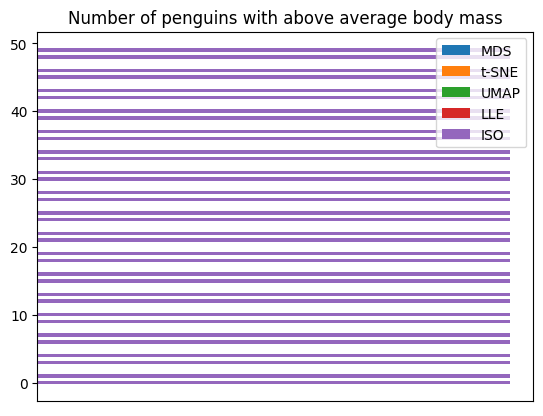

In [116]:
datasets = list(orders.keys())[::-1]
weight_counts = {
    "MDS": [0.9 for _ in range(len(datasets)*2)],
    "t-SNE": [0.9 for _ in range(len(datasets)*2)],
    "UMAP": [0.9 for _ in range(len(datasets)*2)],
    "LLE": [0.9 for _ in range(len(datasets)*2)], 
    "ISO": [0.9 for _ in range(len(datasets)*2)]
}
width = 0.5

fig, ax = plt.subplots()

ys = list()
for i in range(len(datasets)):
    ys.append(3*i)
    ys.append(3*i+1)

for i,(boolean, weight_count) in enumerate(weight_counts.items()):
    bottom = bottoms.T[i]
    p = ax.barh(ys, weight_count, width, label=boolean, left=bottom)
    # bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")
ax.set_xticks([])

plt.show()

In [95]:
bottoms.shape

(17, 5)